# Project 3


# Movie Genre Classification

## Sample Submission

Cargue de librerias

In [1]:
import pandas as pd
import os
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, roc_auc_score
from sklearn.model_selection import train_test_split

Cargue de datasets

In [2]:
dataTraining = pd.read_csv('https://github.com/albahnsen/AdvancedMethodsDataAnalysisClass/raw/master/datasets/dataTraining.zip', encoding='UTF-8', index_col=0)
dataTesting = pd.read_csv('https://github.com/albahnsen/AdvancedMethodsDataAnalysisClass/raw/master/datasets/dataTesting.zip', encoding='UTF-8', index_col=0)

### Create count vectorizer

Transformamos los textos con el uso de TfidfVectorizer

In [3]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def split_into_lemmas(text):
    text = text.lower()
    words = text.split()
    return [wordnet_lemmatizer.lemmatize(word) for word in words]

vect = TfidfVectorizer(strip_accents='unicode', token_pattern=r'\w{2,}',sublinear_tf=True, ngram_range=(4, 8),max_df=0.5,analyzer=split_into_lemmas,stop_words='english')
X_dtm = vect.fit_transform(dataTraining['plot'])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Create y

In [4]:
dataTraining['genres'] = dataTraining['genres'].map(lambda x: eval(x))

le = MultiLabelBinarizer()
y_genres = le.fit_transform(dataTraining['genres'])

Partimos en train y test la base de datos

In [5]:
X_train, X_test, y_train_genres, y_test_genres = train_test_split(X_dtm, y_genres, test_size=0.33, random_state=42)

Cargue de librerias

In [6]:
! pip install livelossplot
import keras
import keras.layers as layers
from keras import backend as K
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from livelossplot import PlotLossesKeras
from keras.callbacks import EarlyStopping, ModelCheckpoint
%matplotlib inline

Using TensorFlow backend.


Entrenamiento del modelo - red neuronal

In [11]:
dims = X_train.shape[1]
output_var = y_train_genres.shape[1]
K.clear_session()
print("Building model...")
model = Sequential()
model.add(Dense(2000, input_shape=(dims,),activation='exponential'))
model.add(Dense(output_var))
model.add(Activation('sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['binary_accuracy'])
model.summary()

Building model...
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2000)              69224000  
_________________________________________________________________
dense_2 (Dense)              (None, 24)                48024     
_________________________________________________________________
activation_1 (Activation)    (None, 24)                0         
Total params: 69,272,024
Trainable params: 69,272,024
Non-trainable params: 0
_________________________________________________________________


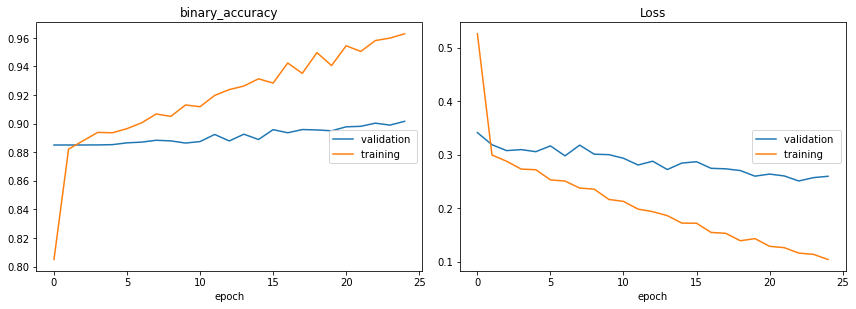

binary_accuracy
	validation       	 (min:    0.885, max:    0.902, cur:    0.902)
	training         	 (min:    0.805, max:    0.963, cur:    0.963)
Loss
	validation       	 (min:    0.251, max:    0.341, cur:    0.260)
	training         	 (min:    0.104, max:    0.526, cur:    0.104)


In [12]:
model.fit(X_train, y_train_genres, validation_data=[X_test, y_test_genres], 
          batch_size=1000, epochs=25, verbose=1,
          callbacks=[PlotLossesKeras()])

Prediccion generos datos test

In [13]:
y_pred_genres = model.predict_proba(X_test)

Desempeño AUC Score

In [14]:
roc_auc_score(y_test_genres, y_pred_genres, average='macro')

0.89534737800383

### Predict the testing dataset

In [15]:
X_test_dtm = vect.transform(dataTesting['plot'])

cols = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
        'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
        'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']

y_pred_test_genres = model.predict_proba(X_test_dtm)

In [16]:
res = pd.DataFrame(y_pred_test_genres, index=dataTesting.index, columns=cols)

In [ ]:
res.to_csv('pred_genres_text_RF.csv', index_label='ID')
from google.colab import files
files.download("pred_genres_text_RF.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>